In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

In [13]:
print(np.unique(y_train))
print(len(np.unique(y_train)))

[0 1 2 3 4 5 6 7 8 9]
10


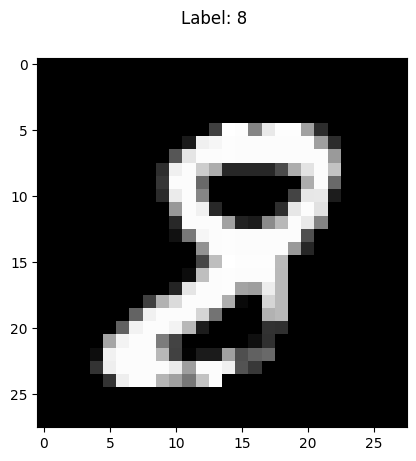

In [38]:
# reconstruct a sample image
import matplotlib.pyplot as plt
random_index = np.random.randint(0, len(x_train))

plt.imshow(x_train[random_index], cmap='gray')
plt.suptitle(f'Label: {y_train[random_index]}')

plt.show()

In [41]:
x_train.shape
# 60000 imagens, 28x28 pixels

# 1 canal (escala de cinza)
# 1 canal = 1 matriz de 28x28
# 60000 imagens = 60000 matrizes de 28x28

(60000, 28, 28)

## Perceptron Multi-Camadas

In [56]:
model_mlp = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_mlp = model_mlp.fit(x_train, y_train, epochs=10, batch_size=128)

model_mlp.evaluate(x_test, y_test)

Epoch 1/10


/home/erlo/.localvenv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8312 - loss: 0.6089
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9497 - loss: 0.1789
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9636 - loss: 0.1266
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9722 - loss: 0.0977
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9786 - loss: 0.0736
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9827 - loss: 0.0628
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9870 - loss: 0.0491
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9877 - loss: 0.0433
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9902 - loss: 0.0371
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9914 - loss: 0.0320
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.9715 - loss: 0.0942


[0.08083562552928925, 0.9753000140190125]

## Rede Neural Convolucional

In [ ]:
model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

history_cnn = model_cnn.fit(x_train, y_train, epochs=10, batch_size=128)

model_cnn.evaluate(x_test, y_test)

Epoch 1/10


/home/erlo/.localvenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8532 - loss: 0.4939
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9804 - loss: 0.0648
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9869 - loss: 0.0414
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9908 - loss: 0.0294
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9928 - loss: 0.0226
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9945 - loss: 0.0178
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9955 - loss: 0.0151
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9960 - loss: 0.0121
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9967 - loss: 0.0105
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9970 - loss: 0.0095
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9879 - loss: 0.0436


[0.03448087349534035, 0.9901999831199646]

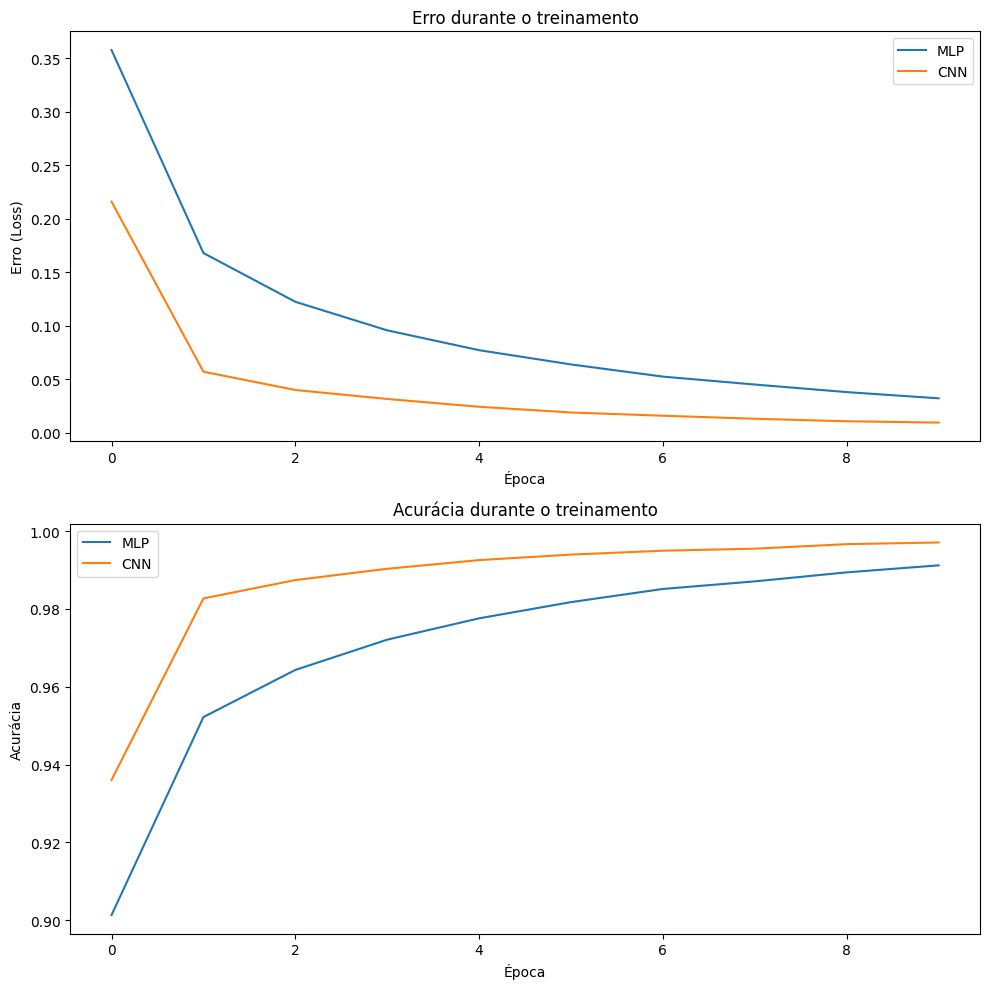

In [79]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax1.plot(history_mlp.history['loss'], label='MLP')
ax1.plot(history_cnn.history['loss'], label='CNN')
ax1.set_title('Erro durante o treinamento')
ax1.set_xlabel('Época')
ax1.set_ylabel('Erro (Loss)')
ax1.legend()

ax2.plot(history_mlp.history['accuracy'], label='MLP')
ax2.plot(history_cnn.history['accuracy'], label='CNN')
ax2.set_title('Acurácia durante o treinamento')
ax2.set_xlabel('Época')
ax2.set_ylabel('Acurácia')
ax2.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.9715 - loss: 0.0942
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9879 - loss: 0.0436


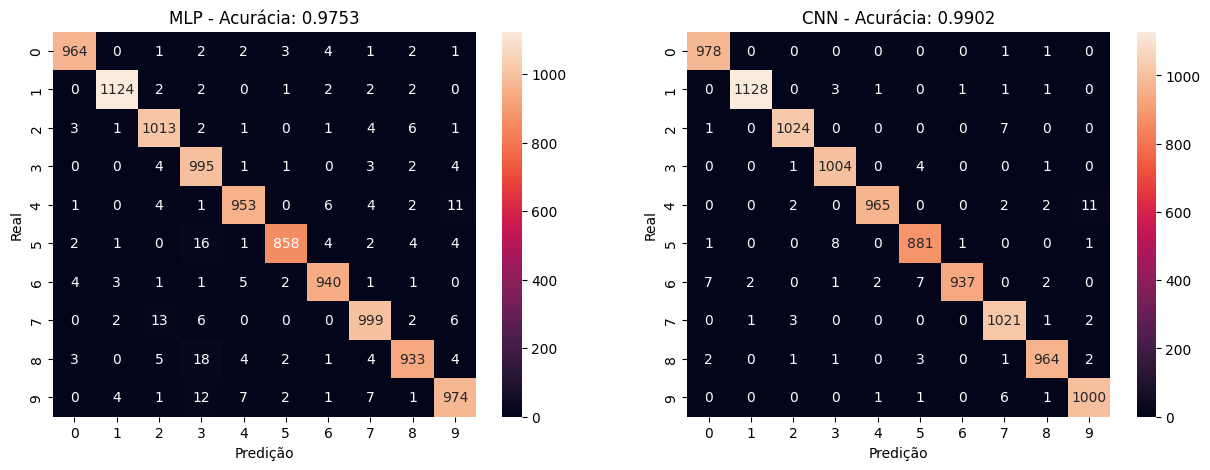

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_cnn = model_cnn.predict(x_test)
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)

y_pred_mlp = model_mlp.predict(x_test)
y_pred_mlp = np.argmax(y_pred_mlp, axis=1)


fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt='d', ax=ax[0])
ax[0].set_title(f'MLP - Acurácia: {(model_mlp.evaluate(x_test, y_test)[1]):.4f}')
ax[0].set_xlabel('Predição')
ax[0].set_ylabel('Real')

sns.heatmap(confusion_matrix(y_test, y_pred_cnn), annot=True, fmt='d', ax=ax[1])
ax[1].set_title(f'CNN - Acurácia: {(model_cnn.evaluate(x_test, y_test)[1]):.4f}')
ax[1].set_xlabel('Predição')
ax[1].set_ylabel('Real')

plt.show()